In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## 
1. Clustering with the Iris Dataset
- Using the modeling lesson as a guide, we'll perform clustering on the iris dataset.
- a. Ask #1: Choose features other than the ones used in the lesson.
- b. Visualize the results of your clustering.
- c. Use the elbow method to visually select a good value for k.
- d. Repeat the clustering, this time with 3 different features.
2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!
3. How does scaling impact the results of clustering?
Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [2]:
df = sns.load_dataset("iris")

# Since we have an ask of using different features, let's whip up a couple more:
# Feature Engineering
df["sepal_area"] = df.sepal_length * df.sepal_width
df["petal_area"] = df.petal_length * df.petal_width

In [3]:

train_validate, test = train_test_split(df, train_size=.80, random_state=1349)
train, validate = train_test_split(train_validate, random_state=1349)

train.shape, validate.shape, test.shape

((90, 7), (30, 7), (30, 7))

In [4]:
# Scale the datasets
scaler = MinMaxScaler()
cols = train.drop(columns=["species"]).columns.tolist()

# .copy() makes a proper copy
# this is an alternative to wrapping the scaled numpy array in a pd.Dataframe()
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

# apply our scaler (fit only on train!)
train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.transform(validate[cols])
test_scaled[cols] = scaler.transform(test[cols])

In [5]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
115,0.583333,0.500000,0.724138,0.916667,virginica,0.523477,0.766497
80,0.333333,0.166667,0.465517,0.416667,versicolor,0.159840,0.258249
4,0.194444,0.666667,0.051724,0.041667,setosa,0.399600,0.010787
86,0.666667,0.458333,0.620690,0.583333,versicolor,0.537962,0.440355
20,0.305556,0.583333,0.103448,0.041667,setosa,0.417582,0.014594


In [6]:
# Fit K-Means (just on train, again!)
X = train_scaled[["sepal_area", "petal_area"]]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.predict(X)
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
115,0.583333,0.500000,0.724138,0.916667,virginica,0.523477,0.766497,1
80,0.333333,0.166667,0.465517,0.416667,versicolor,0.159840,0.258249,0
4,0.194444,0.666667,0.051724,0.041667,setosa,0.399600,0.010787,2
86,0.666667,0.458333,0.620690,0.583333,versicolor,0.537962,0.440355,0
20,0.305556,0.583333,0.103448,0.041667,setosa,0.417582,0.014594,2


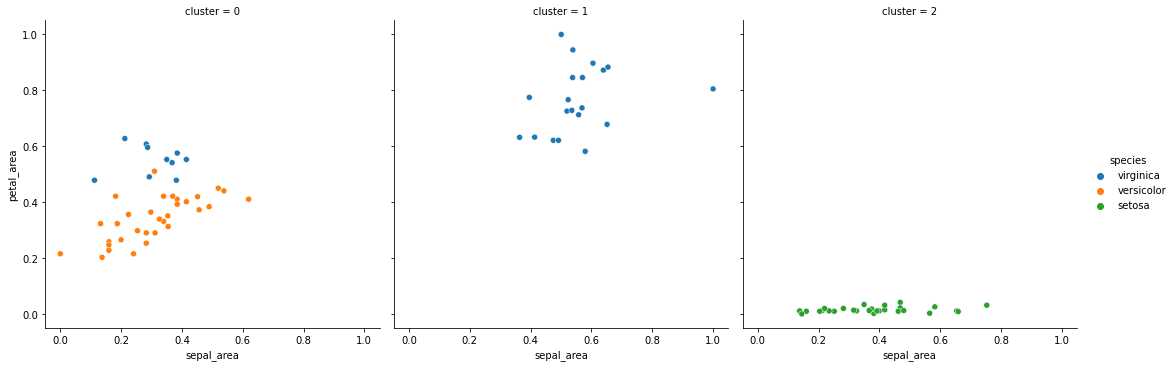

In [7]:
# visualize w/ hue="species" style="cluster"
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", data=train_scaled)

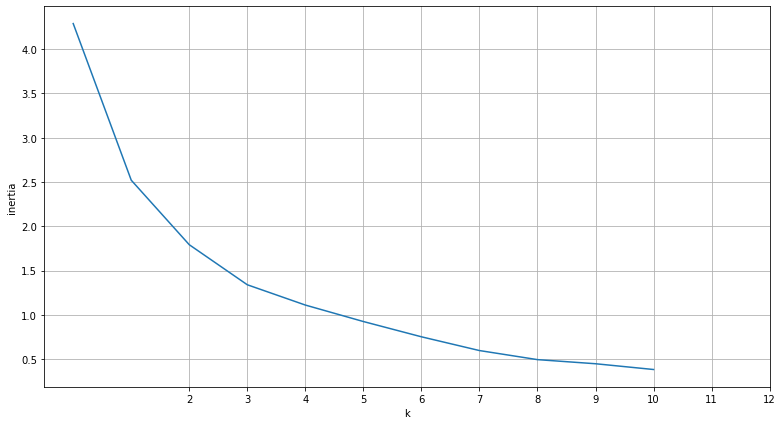

In [8]:
def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))

df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [9]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
115,0.583333,0.500000,0.724138,0.916667,virginica,0.523477,0.766497,1
80,0.333333,0.166667,0.465517,0.416667,versicolor,0.159840,0.258249,0
4,0.194444,0.666667,0.051724,0.041667,setosa,0.399600,0.010787,2
86,0.666667,0.458333,0.620690,0.583333,versicolor,0.537962,0.440355,0
20,0.305556,0.583333,0.103448,0.041667,setosa,0.417582,0.014594,2


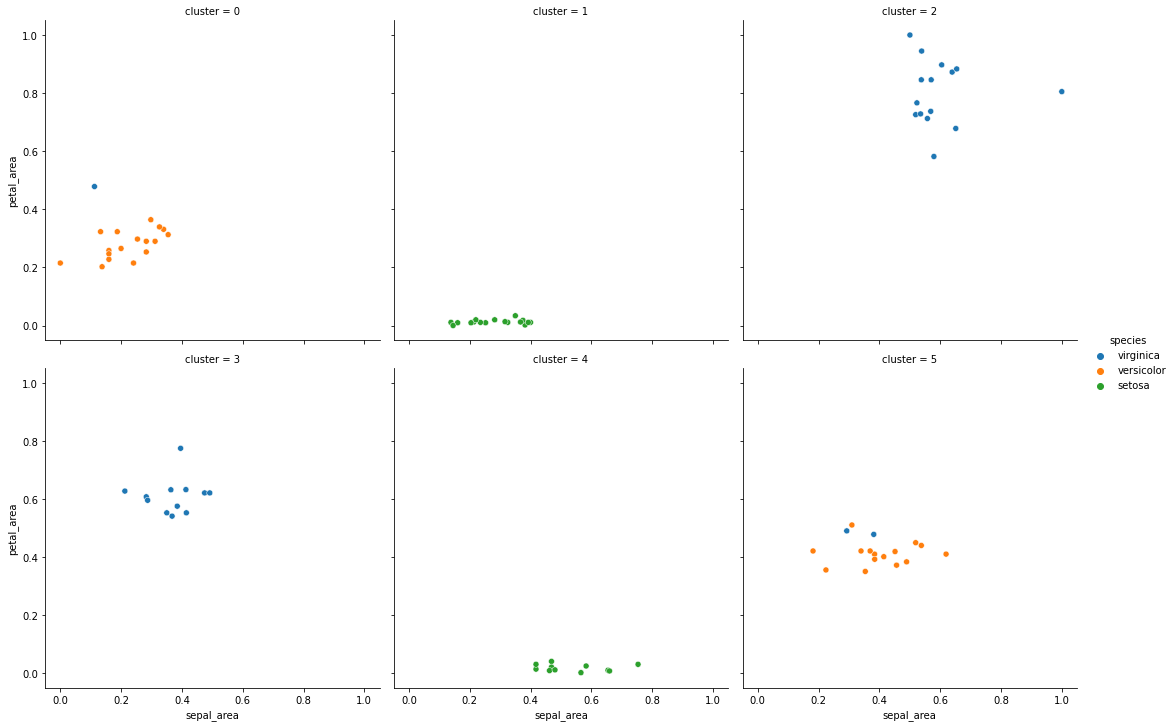

In [10]:
# Fit K-Means
X = train_scaled[["sepal_area", "petal_area", "sepal_length", "petal_width"]]
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

# visualize w/ hue="species" style="cluster"
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", col_wrap=3, data=train_scaled)

# Clustering Mall Data

In [12]:
import env
# build a simple query:
db = "mall_customers"
query = 'SELECT * FROM customers'

url  = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db}'
df = pd.read_sql(query, url, index_col="customer_id")

# Encode gender
df.gender = df.gender.apply(lambda x: 1 if x == "Female" else 0)

# Split nice and early
train_validate, test = train_test_split(df, train_size=.80, random_state=123)
train, validate = train_test_split(train_validate, random_state=123)

train.shape, validate.shape, test.shape

train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
64,1,54,47,59
49,1,29,40,42
25,1,54,28,14
137,1,44,73,7
177,0,58,88,15


In [13]:
# Scale the datasets

# Start w/ empty copies to retain the original splits
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

# Scale the datasets
scaler = MinMaxScaler()
cols = train.drop(columns=["gender"]).columns.tolist()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.transform(validate[cols])
test_scaled[cols] = scaler.transform(test[cols])

# Add back in the gender column to the dataframes
train_scaled["gender"] = train.gender.copy()
validate_scaled["gender"] = validate.gender.copy()
test_scaled["gender"] = test.gender.copy()

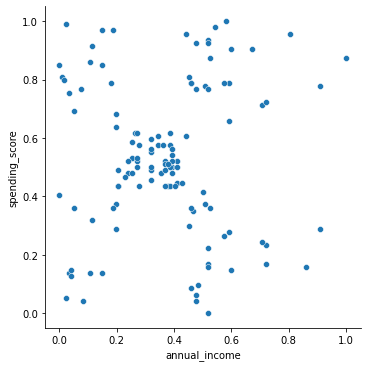

In [14]:
sns.relplot(x="annual_income", y="spending_score", data=train_scaled)

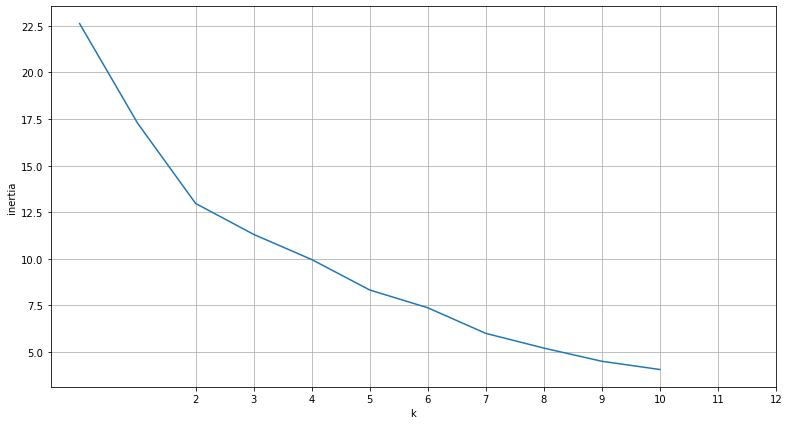

In [15]:
X = train_scaled.copy()

def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))
df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [16]:
# Looks like the sweet spot is 4, 5, or 6
# Let's start with and visualize kmeans clusters w/ k=5

# Fit K-Means
X = train_scaled.copy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

train_scaled.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
64,1,0.692308,0.262295,0.617021,0
49,1,0.211538,0.204918,0.436170,3
25,1,0.692308,0.106557,0.138298,0
137,1,0.500000,0.475410,0.063830,0
177,0,0.769231,0.598361,0.148936,1


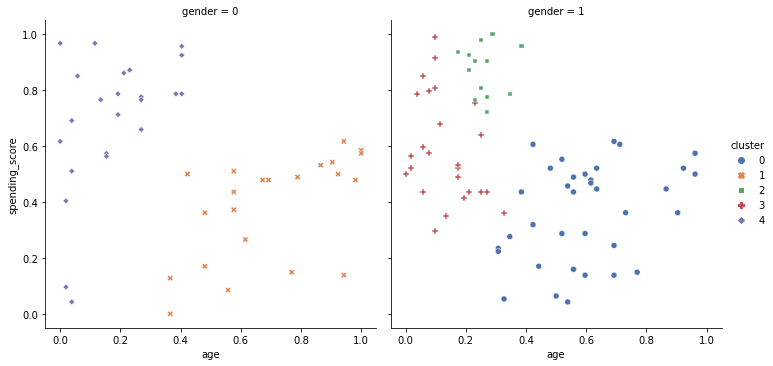

In [17]:
# One column per gender value
# One color/shape for each cluster label
sns.relplot(x="age", y="spending_score", style="cluster", hue="cluster", col="gender", palette="deep", data=train_scaled)

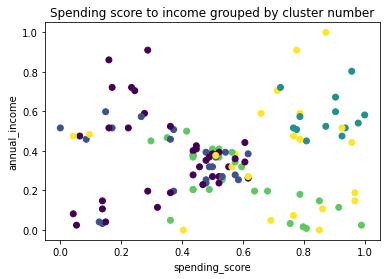

In [18]:
plt.title("Spending score to income grouped by cluster number")
plt.scatter(train_scaled.spending_score, train_scaled.annual_income, c=train_scaled.cluster)
plt.xlabel("spending_score")
plt.ylabel("annual_income")
plt.show()

In [19]:
# Looks like the sweet spot is 4, 5, or 6
# Let's start with and visualize kmeans clusters w/ k=4

# Fit K-Means
X = train_scaled.copy()
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

train_scaled.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
64,1,0.692308,0.262295,0.617021,3
49,1,0.211538,0.204918,0.436170,2
25,1,0.692308,0.106557,0.138298,3
137,1,0.500000,0.475410,0.063830,3
177,0,0.769231,0.598361,0.148936,0


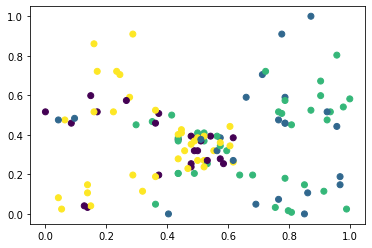

In [20]:
# Hmm... with this, it looks like 5 clusters are more evident. 
# Consisten and frequent overlap among the 4 existing clusters in the middle
plt.scatter(train_scaled.spending_score, train_scaled.annual_income, c=train_scaled.cluster)

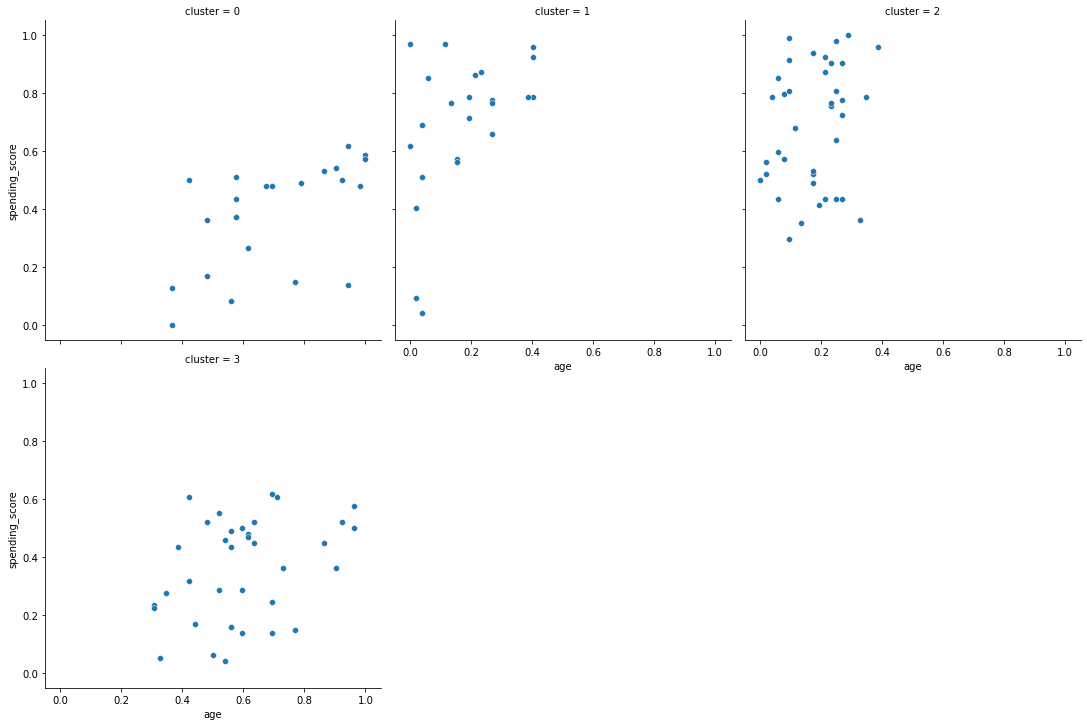

In [21]:
# One column per gender value
# One color/shape for each cluster label
sns.relplot(x="age", y="spending_score", col="cluster", col_wrap=3, data=train_scaled)

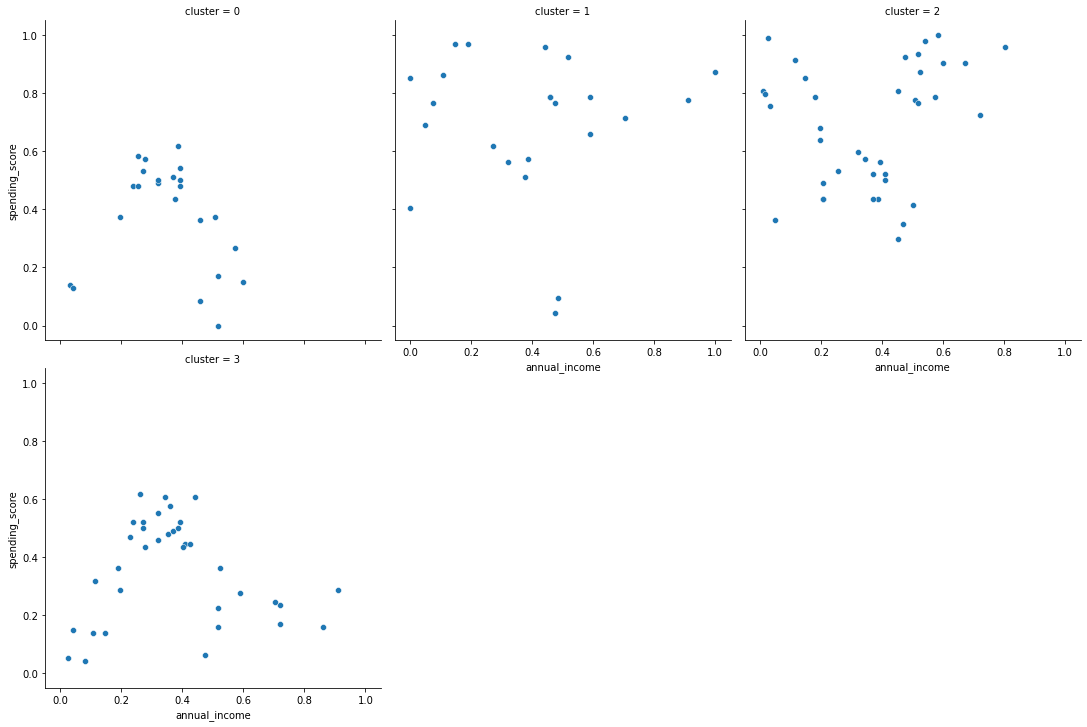

In [22]:
# One column per gender value
# One color/shape for each cluster label
sns.relplot(x="annual_income", y="spending_score", col="cluster", col_wrap=3, data=train_scaled)

## Compare scaled clusters vs. unscaled clusters

In [23]:
train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
64,1,54,47,59
49,1,29,40,42
25,1,54,28,14
137,1,44,73,7
177,0,58,88,15


In [24]:
train.describe()

,gender,age,annual_income,spending_score
count,120.000000,120.000000,120.000000,120.000000
mean,0.616667,38.900000,60.166667,50.816667
std,0.488237,14.637008,25.937330,24.240040
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,27.000000,40.000000,35.000000
50%,1.000000,36.500000,61.500000,49.500000
75%,1.000000,49.000000,77.000000,73.000000
max,1.000000,70.000000,137.000000,95.000000


<ipython-input-25-b89ff525cebb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cluster'] = kmeans.labels_


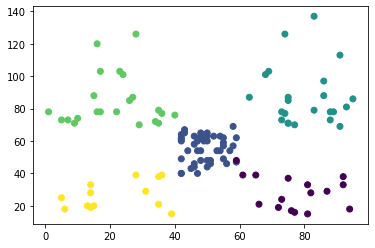

In [25]:
# Looks like the sweet spot is 5
# We'll use annual income and spending score this time since they had those lumps

# Fit K-Means
X = train.copy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train['cluster'] = kmeans.labels_
plt.scatter(train.spending_score, train.annual_income, c=train.cluster)

#### The unscaled clusters look more well defined with less overlap (at least w/ the income vs. spending score)

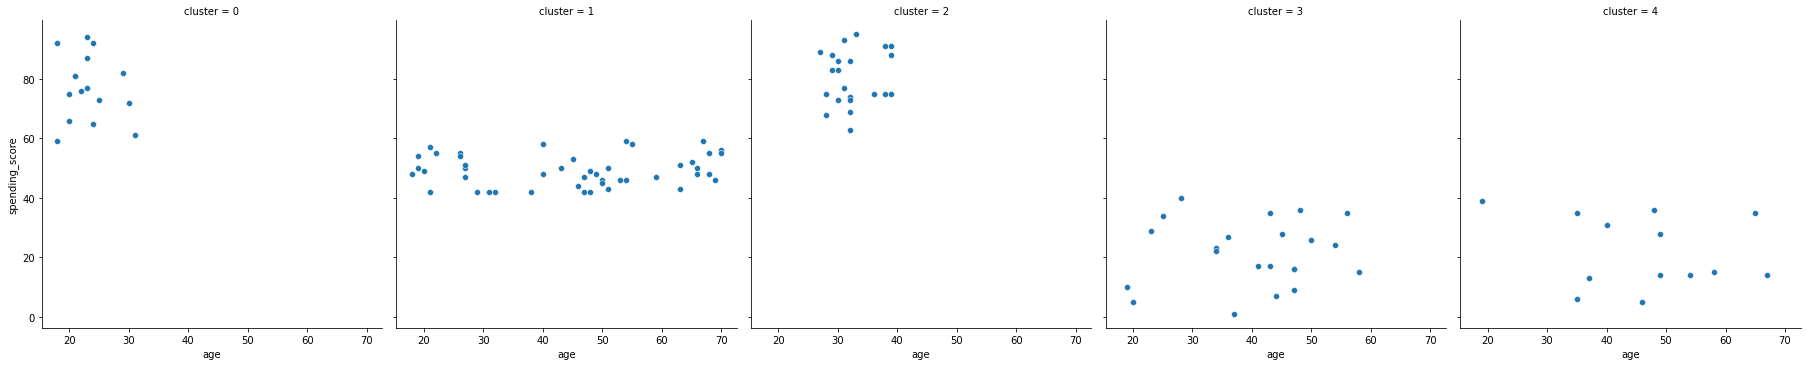

In [26]:
# One column per gender value
# One color/shape for each cluster label
sns.relplot(x="age", y="spending_score", col="cluster", data=train)

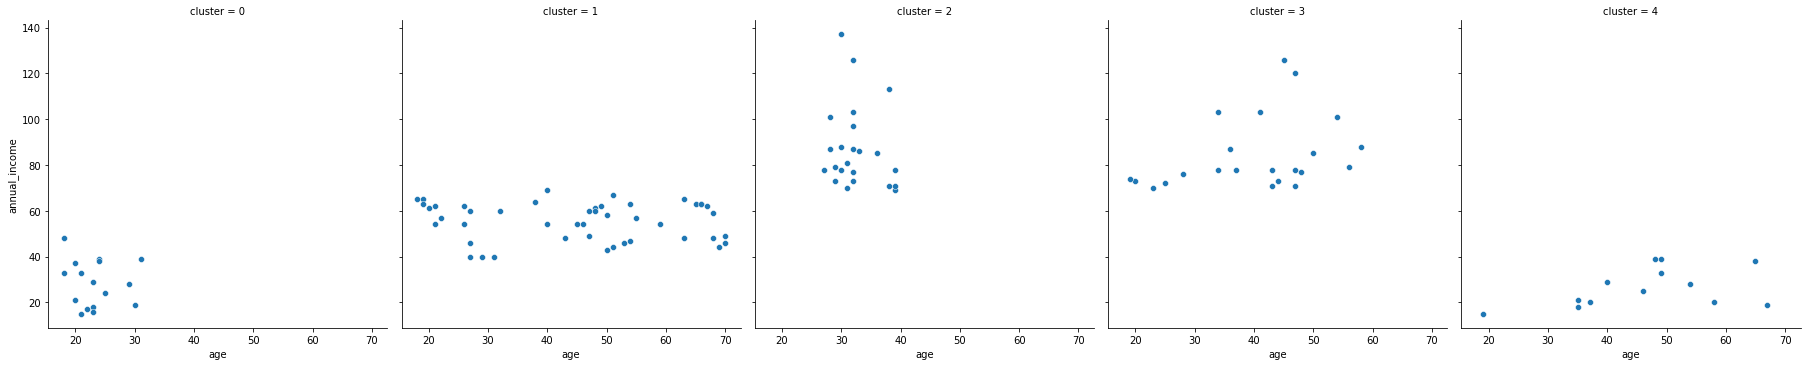

In [27]:
sns.relplot(x="age", y="annual_income", col="cluster", data=train)

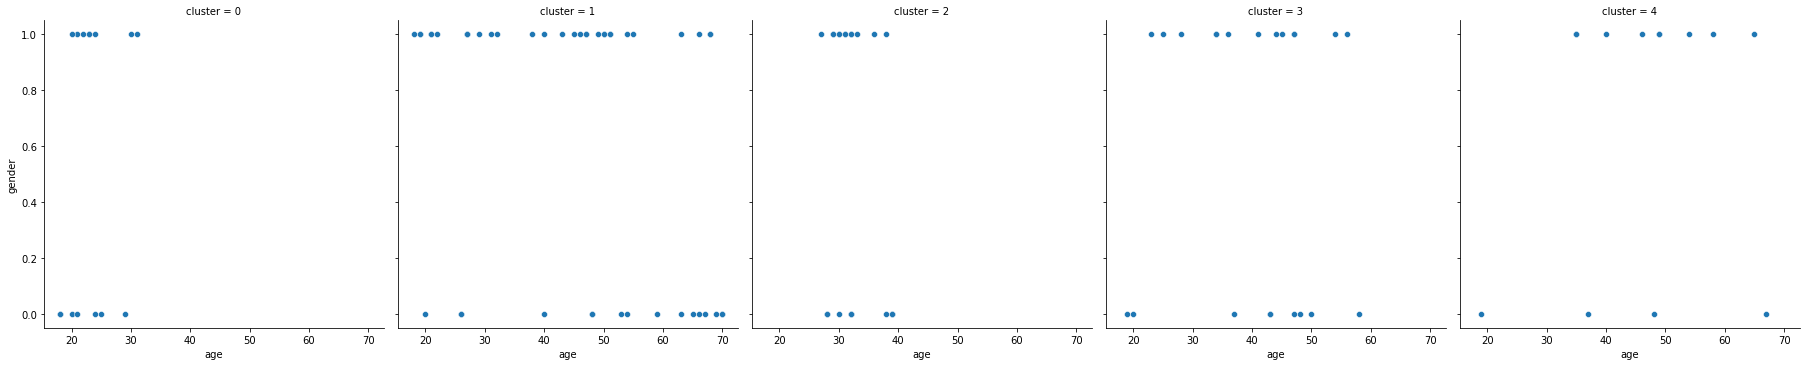

In [28]:
sns.relplot(x="age", y="gender", col="cluster", data=train)


## Takeaways about our clusters from the above charts/features/clusters:
- What do these charts tell us about the story of the clusters? Do they mean anything?
- Let's make marketing profiles/personas

### Cluster 0 == average_spenders_who_could_afford_more (good/steady (if we had frequency of transaction)
- Spending scores in 40-60 range
- Incomes are in the top of the bottom half of incomes
- Age/gender don't seem to have a huge difference
- 64% women, 36% male
- 25-40 year old males are not present (not sure why)

### Cluster 1 == low_spenders
- Bottom quarter of income
- Bottom 40% of spending scores
- 2/3rds women, 1/3rd male
    
### Cluster 2 == Thrifty  (we might say savers, but we don't know for sure what they're doing with what they don't spend at the mall)
- Bottom half of spending ratio
- Top half of income
- Gender/age is evenly distributed
- These folks might be savers OR they're funding the customers in Cluster 2 (Cluster 2 is giving credit card to Cluster 3)
    
### Cluster 3 == college kids / young people making purchases - great customers
- Top half of spending scores
- Aged up to 30
- Income is low, age is low
- Gender is evenly split
    
### Cluster 4 == young professionals, possibly family
- top half of spending score
- top half of income score
- age range 28-4
- 2/3rds women and 1/3 male"